<a href="https://colab.research.google.com/github/arturkozun/standard_vs_latin/blob/main/standard_vs_latin2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale the images so the value of each pixel is in the range from 0 to 1 (for images we can just divide it by 255)
train_datagen = ImageDataGenerator(rescale = 1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/standard_vs_latin',
    target_size = (133, 200),
    batch_size = 50,
    class_mode = 'binary')

validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/validation_standard_vs_latin',
    target_size = (133, 200),
    batch_size = 16,
    class_mode = 'binary')

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape= (133, 200, 3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),



      tf.keras.layers.Flatten(),

      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation = 'sigmoid')
  ])

model.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=10,
    verbose=1,
    validation_data = validation_generator,
    validation_steps = 8
)

Epoch 1/10
8/8 [==============================] - 3s 231ms/step - loss: 1.1572 - accuracy: 0.4875 - val_loss: 0.6639 - val_accuracy: 0.5234
Epoch 2/10
8/8 [==============================] - 1s 191ms/step - loss: 0.6281 - accuracy: 0.6125 - val_loss: 0.5397 - val_accuracy: 0.7031
Epoch 3/10
8/8 [==============================] - 2s 209ms/step - loss: 0.4874 - accuracy: 0.7800 - val_loss: 0.3465 - val_accuracy: 0.9219
Epoch 4/10
8/8 [==============================] - 2s 219ms/step - loss: 0.4492 - accuracy: 0.7800 - val_loss: 0.3333 - val_accuracy: 0.8672
Epoch 5/10
8/8 [==============================] - 2s 242ms/step - loss: 0.2947 - accuracy: 0.8875 - val_loss: 0.2482 - val_accuracy: 0.9219
Epoch 6/10
8/8 [==============================] - 2s 231ms/step - loss: 0.1663 - accuracy: 0.9400 - val_loss: 0.2388 - val_accuracy: 0.9297
Epoch 7/10
8/8 [==============================] - 2s 227ms/step - loss: 0.1563 - accuracy: 0.9400 - val_loss: 0.2313 - val_accuracy: 0.9219
Epoch 8/10
8/8 [====

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

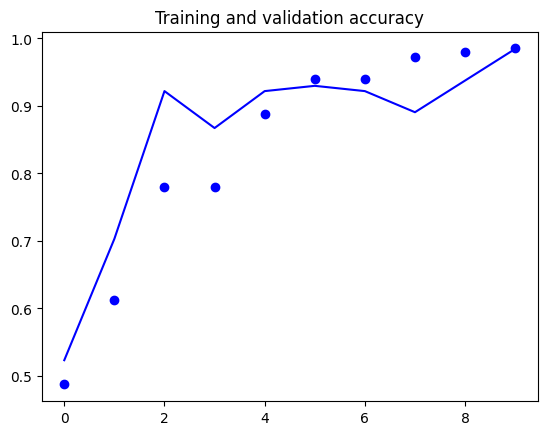

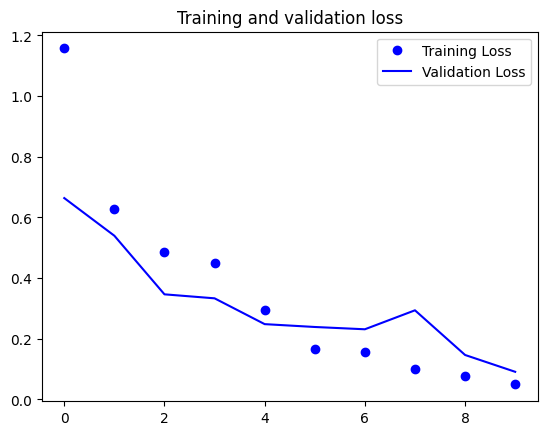

In [ ]:
plot_loss_acc(history)

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(133, 200))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is standard")
  else:
    print(fn + " is latin")

Saving 66_355041_41384_641333__60724.jpg to 66_355041_41384_641333__60724.jpg
Saving 67__41384_641333_1445_D5X_2813.jpg to 67__41384_641333_1445_D5X_2813.jpg
Saving 67__41384_641333_1482_SZAR8960.jpg to 67__41384_641333_1482_SZAR8960.jpg
Saving 67__41384_641333_1501_D5X_2858.jpg to 67__41384_641333_1501_D5X_2858.jpg
Saving 67_355041_41384_641333_0966_D5X_2376.jpg to 67_355041_41384_641333_0966_D5X_2376.jpg
Saving 67_370357_41384_641333_0668_D5X_2212.jpg to 67_370357_41384_641333_0668_D5X_2212.jpg
1/1 [==============================] - 0s 17ms/step
[0.24008988]
66_355041_41384_641333__60724.jpg is latin
1/1 [==============================] - 0s 16ms/step
[0.39709094]
67__41384_641333_1445_D5X_2813.jpg is latin
1/1 [==============================] - 0s 18ms/step
[0.62965125]
67__41384_641333_1482_SZAR8960.jpg is standard
1/1 [==============================] - 0s 17ms/step
[0.43435177]
67__41384_641333_1501_D5X_2858.jpg is latin
1/1 [==============================] - 0s 16ms/step
[0.12708